# Linear Regression Project Exercise 

This notebook implements feature engineering, cross validation, and grid search on the Ames Housing dataset to create a linear regression model. I use a test holdout set to test the model performance and calculate some metrics.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Data

In [84]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [85]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<AxesSubplot:>

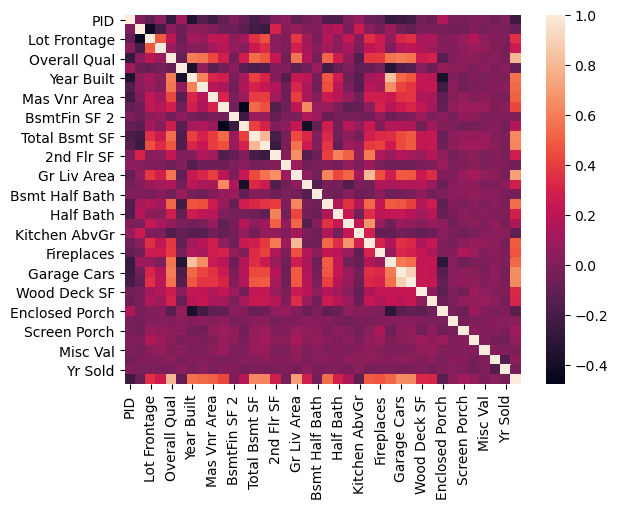

In [86]:
sns.heatmap(df.corr())

In [87]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

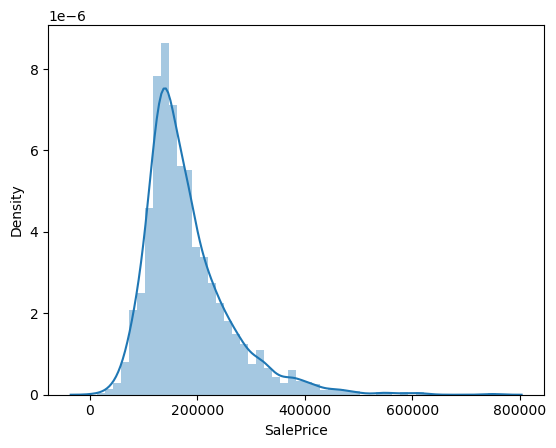

In [88]:
sns.distplot(df["SalePrice"])

# Looking for Outliers

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

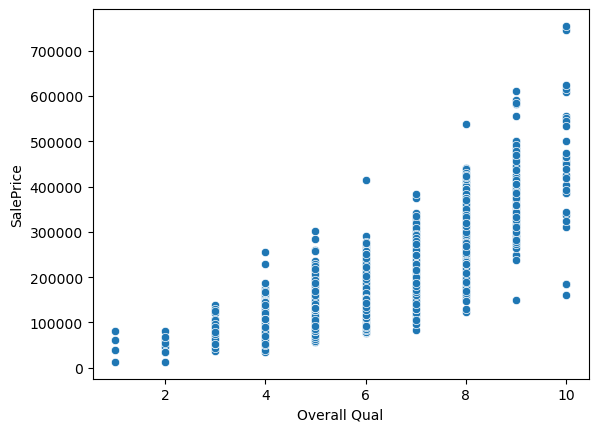

In [89]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [90]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [91]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(ind_drop,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

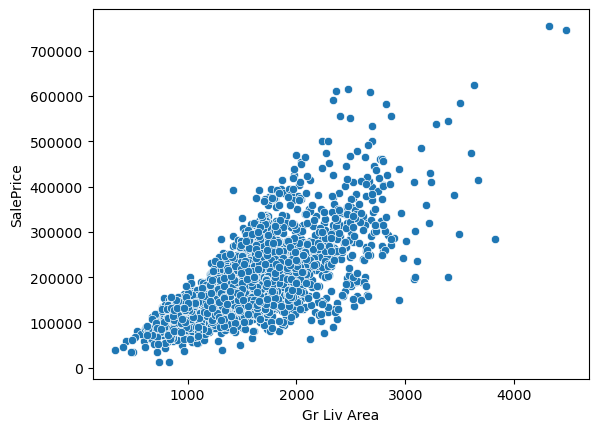

In [92]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

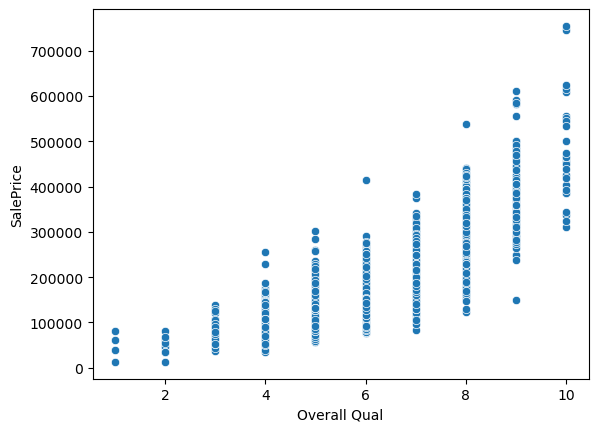

In [93]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

# Dealing with Missing Data

In [94]:
# removing an unnecessary 
df = df.drop('PID',axis=1)

In [95]:
df.isnull().sum().sort_values().tail(30)

Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Total Bsmt SF        1
Electrical           1
Bsmt Unf SF          1
Garage Area          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Bsmt Half Bath       2
Bsmt Full Bath       2
Mas Vnr Area        23
Mas Vnr Type        23
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Cond        159
Lot Frontage       490
Fireplace Qu      1422
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
dtype: int64

In [96]:
def percent_missing(df):
    percent_null = 100 * df.isnull().sum() / len(df)
    percent_null = percent_null[percent_null > 0].sort_values()
    return percent_null

In [97]:
percent_null = percent_missing(df)

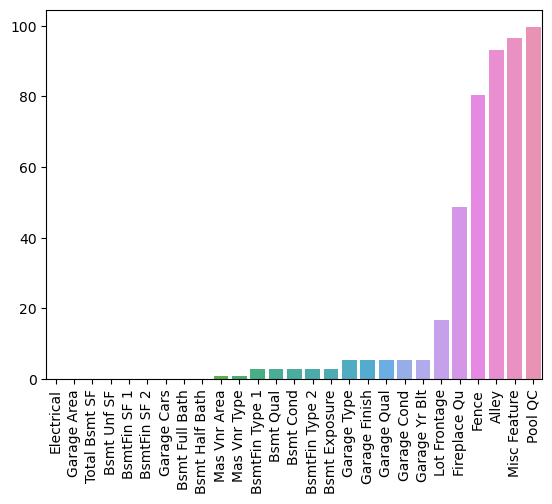

In [98]:
sns.barplot(x=percent_null.index, y=percent_null)
plt.xticks(rotation=90);

## Filling in Data 

In [99]:
percent_null[percent_null < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [100]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [101]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


Fill basement features based on information from data dictionary: numerical columns with null signify no basement, so counts should be zero; string columns with null signify there are no features because there is no basement so should be 'None'

In [102]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [103]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

Similarly, masonry veneer can be filled

In [104]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

## Dropping Rows

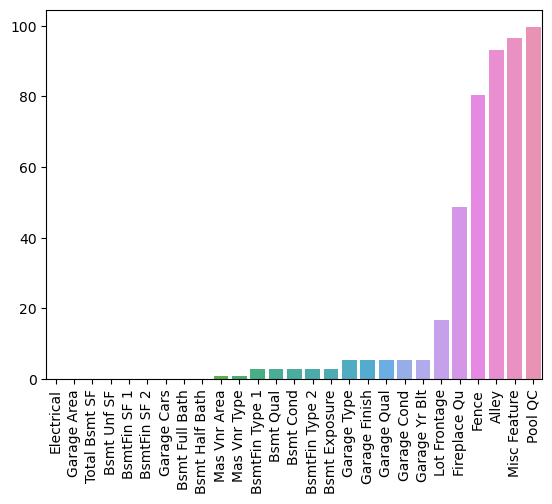

In [105]:
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);

In [106]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [107]:
percent_null = percent_missing(df)

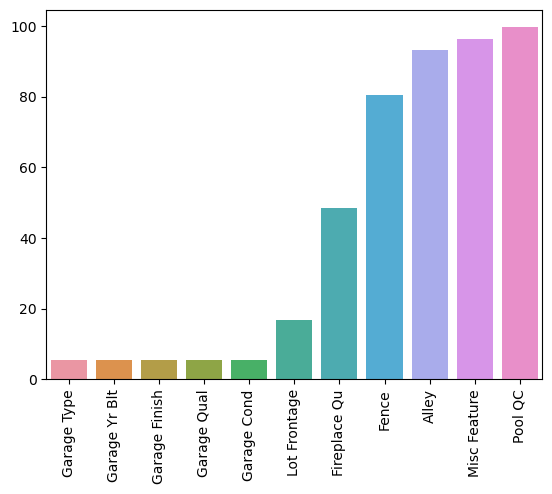

In [108]:
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);

As with basement and masonry veneer, we know Garage columns with nulls means there is no garage.

In [109]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

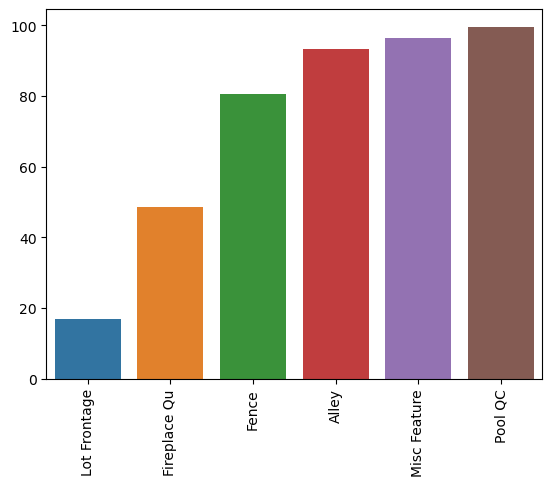

In [110]:
percent_null = percent_missing(df)
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);

In [111]:
df[['Pool QC','Misc Feature','Alley','Fence']] = df[['Pool QC','Misc Feature','Alley','Fence']].fillna(0)

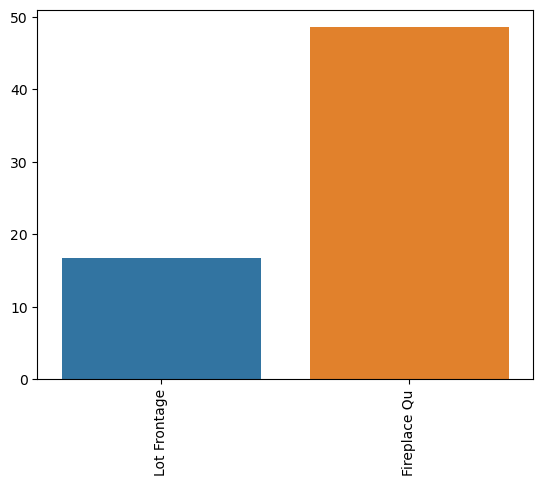

In [112]:
percent_null = percent_missing(df)
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);

In [113]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

## Imputing

For Lot Frontage, I'll use the group mean for neighborhoods as the imputation  value

In [114]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [115]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

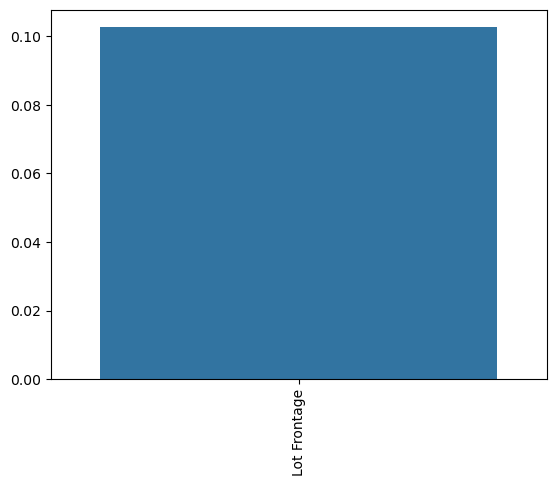

In [116]:
percent_null = percent_missing(df)
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);

In [117]:
df['Lot Frontage'] =  df['Lot Frontage'].fillna(0)

## Categorical Data

The MSSubClass encoding, according to the data dictionary, is just a number code per class. It makes more sense if it were a string.

In [128]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

Create dummy variables.

In [129]:
df_objects = df.select_dtypes(include='object')
df_objects = pd.get_dummies(df_objects, drop_first=True)
df_numeric = df.select_dtypes(exclude='object')
final_df = pd.concat([df_numeric,df_objects],axis=1)

# Machine Learning 

In [132]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [133]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Columns: 288 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(252)
memory usage: 1.5 MB


## Separate out the target feature 'SalePrice'

In [134]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Numerical columns are on vastly different scales. Scaling them helps the model perform better.

In [138]:
scaler = StandardScaler()

In [139]:
scaler.fit(X_train)

StandardScaler()

In [140]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Use an elastic model and grid search to dynamically find the best balance between the lasso and ridge regression methods.

In [142]:
elastic_model = ElasticNet()

In [143]:
param_grid = {'alpha':[0.001,1,5,10,50,100],
                'l1_ratio' : [0.1,0.5,0.7,0.95,0.99,1]}

Run a grid search to find the optimal parameter combination.

In [145]:
net_model = GridSearchCV(estimator=elastic_model,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5)

In [146]:
net_model.fit(X_train,y_train)

C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343914620508.2657, tolerance: 1355206692.5276783
  model = cd_fast.enet_coordinate_descent(
C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358754800254.703, tolerance: 1307913805.6588457
  model = cd_fast.enet_coordinate_descent(
C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404901327970.8058, tolerance: 1415056940.0061066
  model = cd_fast.enet_coordinate_descent(
C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklearn\

C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401471619149.81415, tolerance: 1415056940.0061066
  model = cd_fast.enet_coordinate_descent(
C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396269626318.73553, tolerance: 1438198040.0882876
  model = cd_fast.enet_coordinate_descent(
C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368673839917.6608, tolerance: 1345680018.2551234
  model = cd_fast.enet_coordinate_descent(
C:\Users\erick\anaconda3\envs\ML_udemy\lib\site-packages\sklea

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

**The best parameters**

In [147]:
net_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

Calculate metrics to determine model performance. 

Mean Absolute Error measures the average of all deviations from  the true y value.

Root Mean Square Error measures the standard deviation of the difference between the predicted and true y value.

In [149]:
y_net_pred = net_model.predict(X_test)
MAE = mean_absolute_error(y_test, y_net_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_net_pred))

In [154]:
print(f'The model has a mean absolute error of: ${round(MAE,2)}')
print(f'The model has a root mean square error of: ${round(RMSE,2)}')

The model has a mean absolute error of: $14055.31
The model has a root mean square error of: $20590.62


Text(0, 0.5, 'Actual SalePrice')

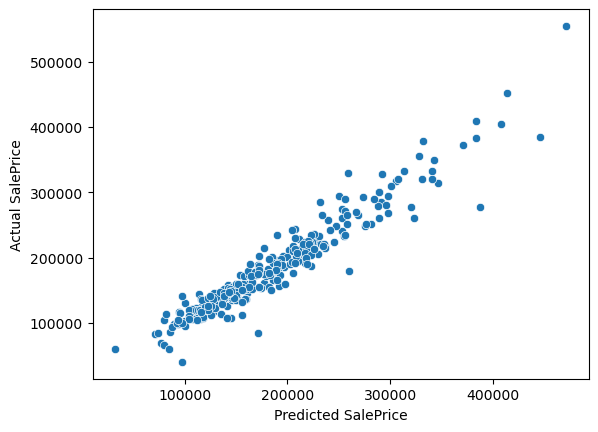

In [156]:
sns.scatterplot(x=y_net_pred, y=y_test,lin)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

In [160]:
final_df['SalePrice'].describe()

count      2925.000000
mean     180815.537436
std       79951.696564
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [161]:
RMSE / (final_df['SalePrice'].max() - final_df['SalePrice'].min())

0.02774226618094414

In [162]:
RMSE / final_df['SalePrice'].mean()

0.11387635939043401

In [163]:
RMSE / final_df['SalePrice'].std()

0.25753818879819573